In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 33 # Number of the classes used in the training (a-z,I Love You,Thank You,Help,Play,Stop,Hello,Good Morning)

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 33)                363       
                                                                 
Total params: 1433 (5.60 KB)
Trainable params: 1433 (5.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping if there is no scope for the improvement in the accuracy
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation using the ADAM optimizer
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


73/85 [========================>.....] - ETA: 0s - loss: 3.4316 - accuracy: 0.0539
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
85/85 [==============================] - 3s 11ms/step - loss: 3.4214 - accuracy: 0.0551 - val_loss: 3.2944 - val_accuracy: 0.1113
Epoch 2/1000
15/85 [====>.........................] - ETA: 0s - loss: 3.2941 - accuracy: 0.0724

C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/85 [=========================>....] - ETA: 0s - loss: 3.2167 - accuracy: 0.0949
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
85/85 [==============================] - 0s 6ms/step - loss: 3.2035 - accuracy: 0.0984 - val_loss: 2.9970 - val_accuracy: 0.1805
Epoch 3/1000
75/85 [=========================>....] - ETA: 0s - loss: 2.9793 - accuracy: 0.1558
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
85/85 [==============================] - 0s 6ms/step - loss: 2.9729 - accuracy: 0.1563 - val_loss: 2.7578 - val_accuracy: 0.2264
Epoch 4/1000
85/85 [==============================] - ETA: 0s - loss: 2.7826 - accuracy: 0.1891
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
85/85 [==============================] - 0s 6ms/step - loss: 2.7826 - accuracy: 0.1891 - val_loss: 2.5500 - val_accuracy: 0.2793
Epoch 5/1000
83/85 [============================>.] - ETA: 0s - loss: 2.6381 - accuracy: 0.1990
Epoch 5: savin

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

29/29 [==============================] - 0s 3ms/step - loss: 0.8774 - accuracy: 0.7946


In [14]:
#  Cell used for loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 198ms/step
[5.25465402e-05 1.12130409e-02 1.19938675e-04 6.06157293e-04
 9.95437149e-04 3.95308575e-03 2.98559054e-04 2.33431663e-02
 5.49424039e-05 1.48926465e-05 2.00440988e-01 1.07578426e-05
 1.53348816e-03 2.35705427e-03 2.56470579e-04 2.75173653e-02
 7.65532255e-04 8.98372382e-03 1.58691037e-04 2.15280379e-04
 3.72723848e-01 2.23741338e-01 9.83253792e-02 2.34505441e-03
 7.86895453e-06 4.90401639e-04 9.44395579e-05 3.99864791e-03
 3.01615481e-04 7.18616229e-06 4.23402933e-04 5.79716172e-03
 8.85255821e-03]
20


# Confusion matrix

113/113 [==============================] - 0s 2ms/step


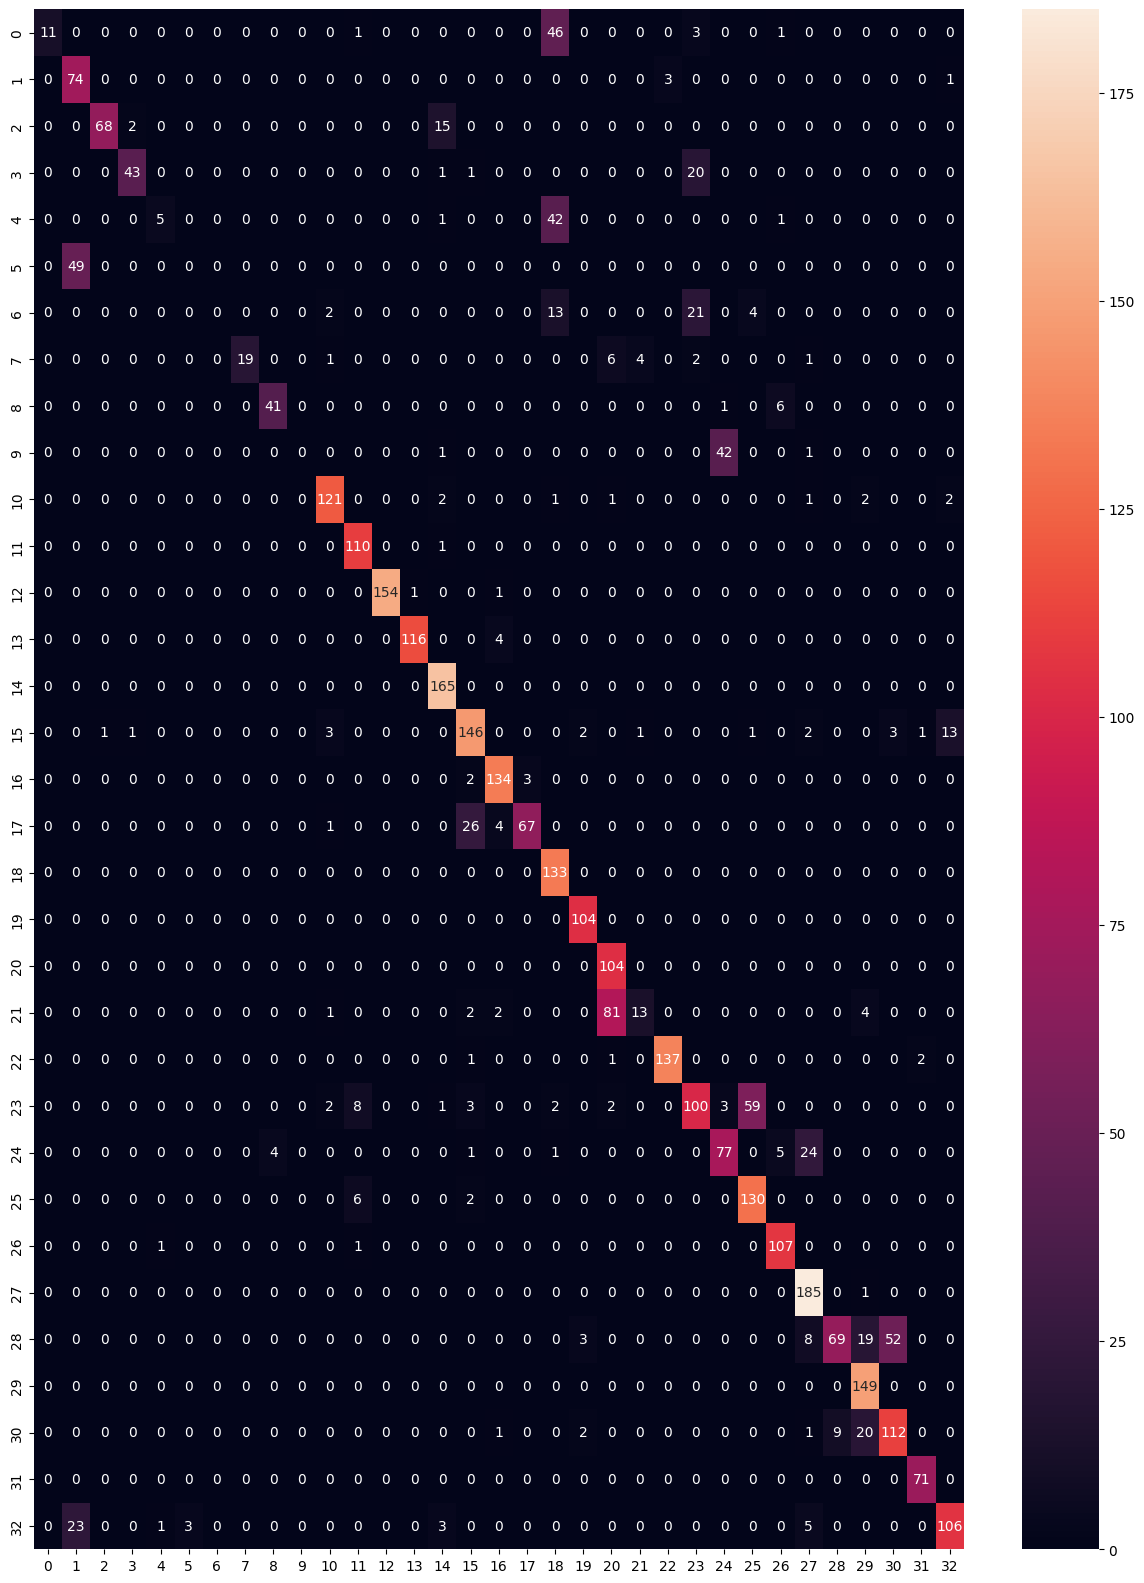

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        62
           1       0.51      0.95      0.66        78
           2       0.99      0.80      0.88        85
           3       0.93      0.66      0.77        65
           4       0.71      0.10      0.18        49
           5       0.00      0.00      0.00        49
           6       0.00      0.00      0.00        40
           7       1.00      0.58      0.73        33
           8       0.91      0.85      0.88        48
           9       0.00      0.00      0.00        44
          10       0.92      0.93      0.93       130
          11       0.87      0.99      0.93       111
          12       1.00      0.99      0.99       156
          13       0.99      0.97      0.98       120
          14       0.87      1.00      0.93       165
          15       0.79      0.84      0.82       174
          16       0.92      0.96      0.94       139
     

C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(15, 20))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
model.save(model_save_path, include_optimizer=False)

C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mohan\AppData\Local\Temp\tmphug7j5nn\assets


INFO:tensorflow:Assets written to: C:\Users\mohan\AppData\Local\Temp\tmphug7j5nn\assets


7820

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Implementation of the inference 
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 15.6 ms
Wall time: 1.62 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.2546442e-05 1.1213032e-02 1.1993857e-04 6.0615625e-04 9.9543575e-04
 3.9530830e-03 2.9855865e-04 2.3343164e-02 5.4942309e-05 1.4892619e-05
 2.0044102e-01 1.0757793e-05 1.5334869e-03 2.3570524e-03 2.5647014e-04
 2.7517356e-02 7.6553173e-04 8.9837220e-03 1.5869076e-04 2.1528022e-04
 3.7272391e-01 2.2374131e-01 9.8325342e-02 2.3450514e-03 7.8689327e-06
 4.9040053e-04 9.4439303e-05 3.9986488e-03 3.0161536e-04 7.1861568e-06
 4.2340299e-04 5.7971575e-03 8.8525526e-03]
20
